This notebook fits a Convolutional Neural Network inorder to detect Hindi characters.

    Let's import the necessary modules:

In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import math
import cv2

from keras.preprocessing import image
from sklearn.metrics import classification_report
import numpy as np
#set up the test, train directories:
train_dir = "datasets/DevanagariHandwrittenCharacterDataset/Train"
test_dir = "datasets/DevanagariHandwrittenCharacterDataset/Test"

Let's try data augmentation:


In [2]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=3,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.05,
    zoom_range=0.1,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

    Generating the data for testing and training:

In [3]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(32, 32),
    batch_size=128,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(32, 32),
    batch_size=128,
    class_mode='categorical'
)


Found 78200 images belonging to 46 classes.
Found 13800 images belonging to 46 classes.


    Defining the CNN's architecture:

In [4]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(46, activation='softmax')  
])

    Configuring the CNN:
    

In [5]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

    Fit the CNN:

In [6]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 128,  
    epochs=20,
    validation_data=test_generator,
    validation_steps=test_generator.samples // 128
)

Epoch 1/20
610/610 [==============================] - 53s 86ms/step - loss: 1.7657 - accuracy: 0.5178 - val_loss: 0.5155 - val_accuracy: 0.8449
Epoch 2/20
610/610 [==============================] - 54s 89ms/step - loss: 0.8012 - accuracy: 0.7654 - val_loss: 0.3106 - val_accuracy: 0.9028
Epoch 3/20
610/610 [==============================] - 55s 90ms/step - loss: 0.5795 - accuracy: 0.8260 - val_loss: 0.2451 - val_accuracy: 0.9220
Epoch 4/20
610/610 [==============================] - 55s 89ms/step - loss: 0.4709 - accuracy: 0.8571 - val_loss: 0.1907 - val_accuracy: 0.9418
Epoch 5/20
610/610 [==============================] - 55s 90ms/step - loss: 0.3964 - accuracy: 0.8802 - val_loss: 0.2117 - val_accuracy: 0.9322
Epoch 6/20
610/610 [==============================] - 54s 89ms/step - loss: 0.3595 - accuracy: 0.8897 - val_loss: 0.1669 - val_accuracy: 0.9479
Epoch 7/20
610/610 [==============================] - 55s 90ms/step - loss: 0.3213 - accuracy: 0.9032 - val_loss: 0.1551 - val_accuracy:

    Let's look at our model's performance:

In [7]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

    Training VS Validation Accuracy:

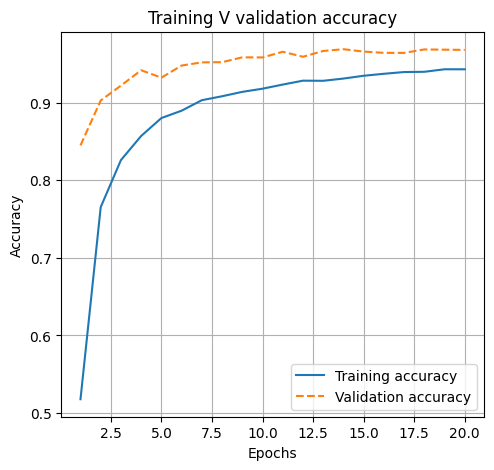

In [8]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val_acc, '--', label='Validation accuracy')
plt.title('Training V validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()


    Training vs Validation Losses:

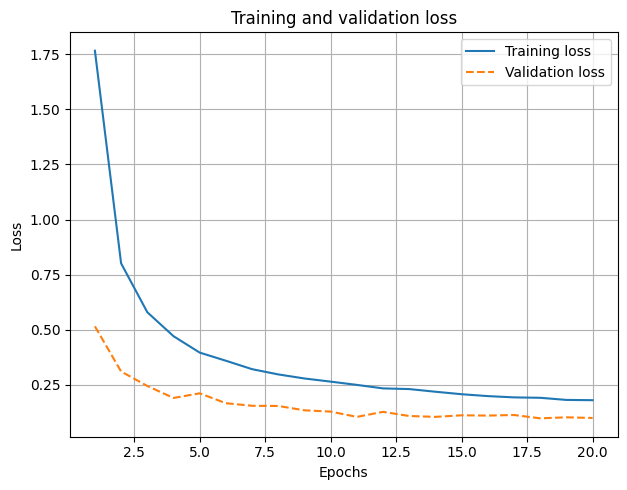

In [9]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, '-', label='Training loss')
plt.plot(epochs, val_loss, '--', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

    Let's test the model with our samples:

In [630]:

img_path = "../Hindi-OCR/ManualTests/ra.png" #load the image.
img = image.load_img(img_path, target_size=(32, 32))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.

1/1 [==============================] - 0s 15ms/step
character_27_ra


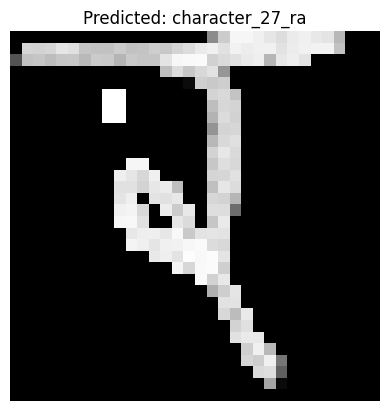

In [631]:

predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)

# 3. Interpret the prediction
class_labels = {v: k for k, v in train_generator.class_indices.items()}
predicted_label = class_labels[predicted_class[0]]
print(predicted_label)


# 4. Display the image with its predicted label
plt.imshow(img_array[0])
plt.title(f"Predicted: {predicted_label}")
plt.axis('off')
plt.show()


    The model failed on that one, let's test it against train:

4/4 [==============================] - 0s 3ms/step


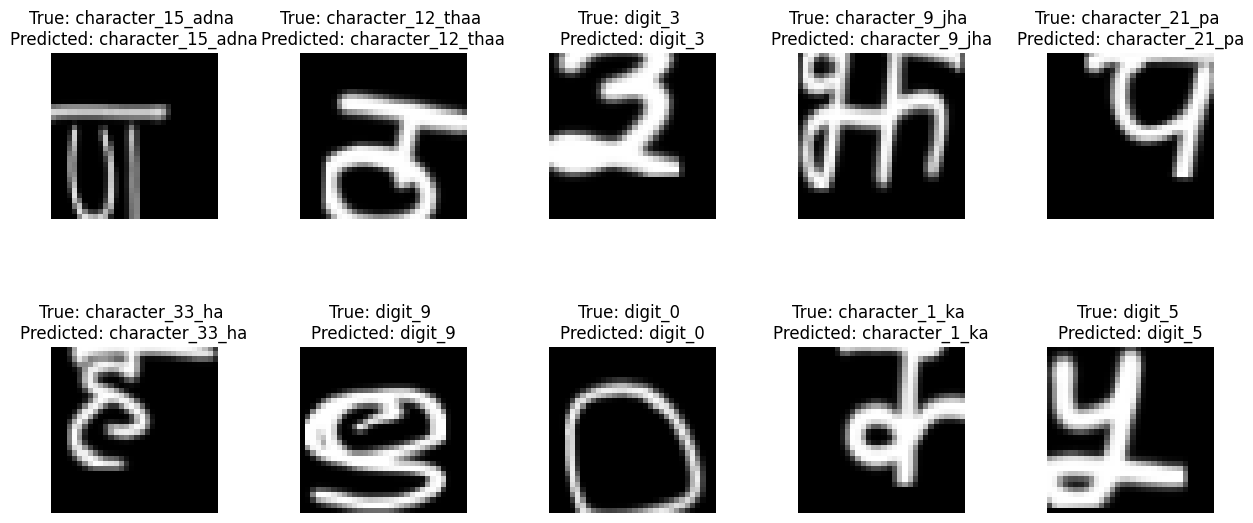

In [619]:
import matplotlib.pyplot as plt

# 1. Get a batch of images and labels
x_batch, y_batch = next(train_generator)

# 2. Predict labels
predictions = model.predict(x_batch)
predicted_classes = np.argmax(predictions, axis=1)

# 3. Display the images with true and predicted labels
class_labels = list(train_generator.class_indices.keys())

fig, axes = plt.subplots(2, 5, figsize=(15, 7))  # Displaying 10 images in a 2x5 grid
axes = axes.ravel()

for i in np.arange(0, 10):  # Adjust this to show as many images as you want
    axes[i].imshow(x_batch[i])
    axes[i].set_title(f"True: {class_labels[np.argmax(y_batch[i])]} \nPredicted: {class_labels[predicted_classes[i]]}")
    axes[i].axis('off')
    
plt.subplots_adjust(wspace=0.5)


    Let's save the model:

In [118]:
from joblib import dump

dump(model, "../Hindi-OCR/Models/CNN.joblib")

['../Hindi-OCR/Models/CNN.joblib']

In [119]:
from joblib import load
model = load("../Hindi-OCR/Models/CNN.joblib")

1/1 [==============================] - 0s 18ms/step


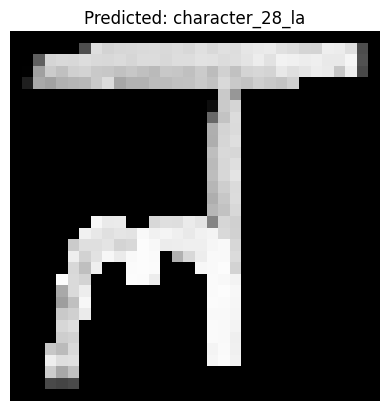

character_28_la


In [625]:
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

def predict_with_preprocessing(img_path, model):
    img = image.load_img(img_path, target_size=(32, 32))
    img_array = image.img_to_array(img)
    img_array /= 255.
    img_array_reshaped = np.expand_dims(img_array, axis=0)
    predictions = model.predict(img_array_reshaped)
    predicted_class = np.argmax(predictions[0])
    class_labels = list(train_generator.class_indices.keys())
    plt.imshow(img_array)
    plt.title(f"Predicted: {class_labels[predicted_class]}")
    plt.axis('off')
    plt.show()
    return class_labels[predicted_class]

result = predict_with_preprocessing("../Hindi-OCR/ManualTests/la_better.PNG", model)
print(result)


    The model is now ready.